# Import data

In [33]:
import os
import pandas as pd
import collections
import seaborn as sns
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [34]:
def importRawData(dir):
    # Import all the data from a directory
    # dir: directory with the data
    # return: a dictionary of dataframes
    dict = {}

    for file in os.listdir(dir):
        if file.endswith('.json'):
            df = pd.read_json(f'{dir}/' + file, lines=True)
            dict[file.removesuffix(".json")] = df

    return dict

raw_data = importRawData('datasets/submissions')

In [35]:
def importPreparedData(path, type="csv"):
    # Import the csv files
    # path: path to the csv files
    # return: dictionary of dataframes for each challenge and each predicate

    allDfs = {} # Dictionary of dataframes for each challenge and each predicate

    # Iterate over the folders
    for folder in os.listdir(path):
        # Iterate over the csv files
        for file in os.listdir(path + folder):
            # Read the file
            if type == "csv":
                df = pd.read_csv(path + folder + "/" + file)
            elif type == "json":
                df = pd.read_json(path + folder + "/" + file, lines=True)
            else:
                print("Error: unknown file type")
                return
            # Add the dataframe to the dictionary
            if folder not in allDfs:
                allDfs[folder] = {}
            cmd = re.sub("\..*", "", file)
            allDfs[folder][cmd] = df
            
        

    return allDfs

# Import the csv files
allDfs = importPreparedData("./all/")
trainDfs = importPreparedData("./train/")
testDfs = importPreparedData("./test/", "json")

# Data analysis

Count number of submissions, correct and incorrect. 

In [36]:
def analyzeRawData(raw_data):
    analysisDf = pd.DataFrame({"Challenge": [], "NumSubmissions": [], "NumCorrect": [], "NumIncorrect": []})
    counter = collections.Counter()

    for challenge, df in raw_data.items():
        count = df["sat"].value_counts().to_dict()
        counter.update(count)
        # Update counter
        analysisDf.loc[len(analysisDf)] = [
            challenge,
            len(df),
            len(df[df["sat"] == 0.0]),
            len(df[df["sat"] == 1.0])
        ]

    print("Total number of submissions: " + str(analysisDf["NumSubmissions"].sum()))
    print("Total number of correct submissions: " + str(analysisDf["NumCorrect"].sum()))
    print("Total number of incorrect submissions: " + str(analysisDf["NumIncorrect"].sum()))

    # Show plot    
    sns.barplot(data=pd.DataFrame.from_dict(counter, orient="index").reset_index(), x="index", y=0, palette=["#0071bc", "#258433", "#a3281d"])
    plt.ylabel("Number of Entries") 
    plt.xlabel("Sat value")

    return analysisDf

def analyzePreparedData(allDfs):
    analysisDf = pd.DataFrame({"Challenge": [], "Predicate": [], "NumSubmissions": [], "NumCorrect": [], "NumIncorrect": [], "NumUniqueASTs": []})
    counter = collections.Counter()

    for challenge, cmdDfs in allDfs.items():
        for cmd, df in cmdDfs.items():
        # Update counter
            count = df["sat"].value_counts().to_dict()
            counter.update(count)
            analysisDf.loc[len(analysisDf)] = [
                challenge,
                cmd,
                len(df),
                len(df[df["sat"] == 0.0]),
                len(df[df["sat"] == 1.0]),
                len(df["ast"].unique())
            ]

    # Sort by number of submissions
    analysisDf = analysisDf.sort_values(by=['NumSubmissions'], ascending=False)

    print("Total number of submissions: " + str(analysisDf["NumSubmissions"].sum()))
    print("Total number of correct submissions: " + str(analysisDf["NumCorrect"].sum()))
    print("Total number of incorrect submissions: " + str(analysisDf["NumIncorrect"].sum()))
    print("Total number of unique ASTs: " + str(analysisDf["NumUniqueASTs"].sum()))

    # Show plot    
    sns.barplot(data=pd.DataFrame.from_dict(counter, orient="index").reset_index(), x="index", y=0, palette=["#258433", "#a3281d"])
    plt.ylabel("Number of Submissions")
    plt.xlabel("Sat value")

    return analysisDf

## Analyze Raw Data

Check data types.

In [37]:
print(raw_data["9jPK8KBWzjFmBx4Hb"].dtypes)

_id              object
time             object
code             object
derivationOf     object
theme            object
original         object
cmd_i           float64
cmd_c           float64
cmd_n            object
sat             float64
msg              object
dtype: object


Analyze number of entries.

Total number of submissions: 35224
Total number of correct submissions: 10537
Total number of incorrect submissions: 14714


,Challenge,NumSubmissions,NumCorrect,NumIncorrect
0,9jPK8KBWzjFmBx4Hb,5279,1440,2912
1,FwCGymHmbqcziisH5,1263,185,796
2,gAeD3MTGCCv8YNTaK,3111,1004,1390
3,JC8Tij8o8GZb99gEJ,1175,151,683
4,jyS8Bmceejj9pLbTW,840,233,344
5,PQAJE67kz8w5NWJuM,4189,1600,1328
6,sDLK7uBCbgZon3znd,3904,1776,790
7,WGdhwKZnCu7aKhXq9,393,64,219
8,YH3ANm7Y5Qe5dSYem,5630,1788,2390
9,zoEADeCW2b2suJB2k,3225,588,1406


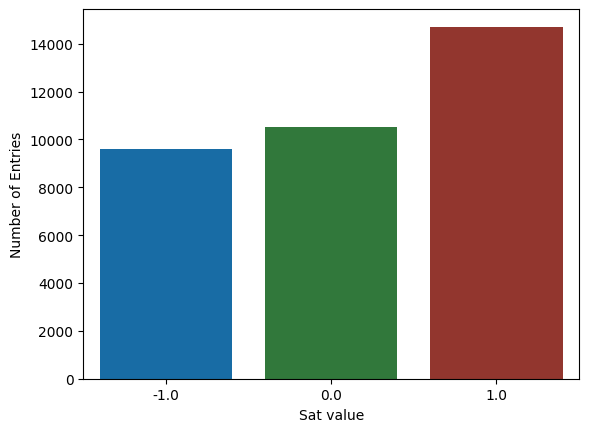

In [38]:
analyzeRawData(raw_data)

Total number of submissions: 23981
Total number of correct submissions: 10515
Total number of incorrect submissions: 13466
Total number of unique ASTs: 9487


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect,NumUniqueASTs
80,YH3ANm7Y5Qe5dSYem,inv11,597,78,519,283
83,YH3ANm7Y5Qe5dSYem,inv14,540,57,483,318
45,gAeD3MTGCCv8YNTaK,weaklyConnected,528,76,452,287
96,zoEADeCW2b2suJB2k,inv4,437,36,401,257
15,9jPK8KBWzjFmBx4Hb,prop5,424,65,359,182
81,YH3ANm7Y5Qe5dSYem,inv12,420,61,359,207
44,gAeD3MTGCCv8YNTaK,undirected,412,209,203,164
3,9jPK8KBWzjFmBx4Hb,prop12,409,37,372,238
16,9jPK8KBWzjFmBx4Hb,prop6,386,119,267,152
102,zRAn69AocpkmxXZnW,inv11,378,83,295,218


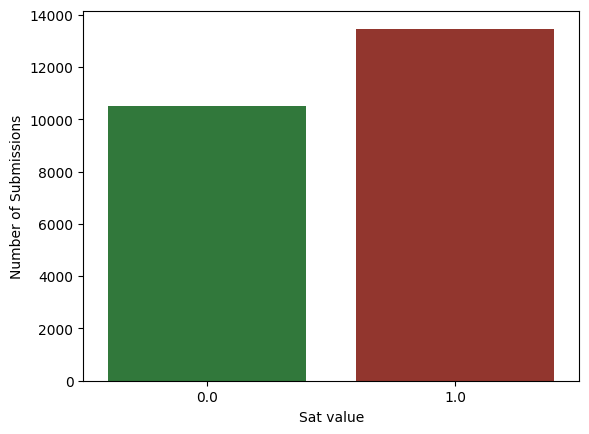

In [39]:
analyzePreparedData(allDfs)

In [40]:
df = allDfs["jyS8Bmceejj9pLbTW"]["Inv2"]
df[df["sat"] == 0.0].drop_duplicates(subset=["expr"])

,_id,time,code,derivationOf,cmd_n,sat,expr,ast
1,PPe4TE573KE54Wsk5,2019,"open util/ordering[Position] sig Position {} sig Product {} sig Component extends Product { parts : set Product, position : one Position } sig Resource extends Product {} sig Robot { position : one Position } pred Inv1 { all c:Component | some c.parts } pred Inv2 { all c:Component | c not in c.^parts } pred Inv3 { } pred Inv4 { }",PK6AhRiBjvfANtR6q,Inv2,0.0,all c:Component | c not in c.^parts,{all{one of{c}{sig/Component}}{!in{c/Component}{.{c/Component}{^{field/parts{set of{sig/Product}}}}}}}
24,YTd3Bp5GHRC4vwo2K,2019,"open util/ordering[Position] sig Position {} sig Product {} sig Component extends Product { parts : set Product, position : one Position } sig Resource extends Product {} sig Robot { position : one Position } pred Inv1 { all c:Component | some c.parts } pred Inv2 { all c:Component | no c.^parts & c } pred Inv3 { } pred Inv4 { }",oiAAQXWfwDgqFfuoQ,Inv2,0.0,all c:Component | no c.^parts & c,{all{one of{c}{sig/Component}}{no{&{.{c/Component}{^{field/parts{set of{sig/Product}}}}}{c/Component}}}}
27,ynKmmMumr9gRaswKa,2020,"open util/ordering[Position] sig Position {} sig Product {} sig Component extends Product { parts : set Product, position : one Position } sig Resource extends Product {} sig Robot { position : one Position } pred Inv1 { all c : Component | some c.parts } pred Inv2 { all c : Component | c not in c.^parts } pred Inv3 { } pred Inv4 { }",weznZKimxAAeN26FC,Inv2,0.0,all c : Component | c not in c.^parts,{all{one of{c}{sig/Component}}{!in{c/Component}{.{c/Component}{^{field/parts{set of{sig/Product}}}}}}}
39,GrRYMyFYQs9muHjAm,2020,"open util/ordering[Position] sig Position {} sig Product {} sig Component extends Product { parts : set Product, position : one Position } sig Resource extends Product {} sig Robot { position : one Position } pred Inv1 { all c : Component | some (c.parts) } pred Inv2 { no c : Component | c in c.^(parts) } pred Inv3 { } pred Inv4 { }",3WLMuzD5wj7RyCMgd,Inv2,0.0,no c : Component | c in c.^(parts),{no{one of{c}{sig/Component}}{in{c/Component}{.{c/Component}{^{field/parts{set of{sig/Product}}}}}}}
43,qxCPdKSGdgy8KWsd9,2020,"open util/ordering[Position] sig Position {} sig Product {} sig Component extends Product { parts : set Product, position : one Position } sig Resource extends Product {} sig Robot { position : one Position } pred Inv1 { parts in Component -> some Product } pred Inv2 { all c:Product | c not in c.^parts } pred Inv3 { all c:Component | some (c.position & Robot.position) } pred Inv4 { all c:Component | (c.parts.position) in (prevs[c.position]+c.position) }",dskTzBbnZP8kvgvkv,Inv2,0.0,all c:Product | c not in c.^parts,{all{one of{c}{sig/Product}}{!in{c/Product}{.{c/Product}{^{field/parts{set of{sig/Product}}}}}}}
59,3jj6KrvD3yoBgQ8kg,2020,"open util/ordering[Position] sig Position {} sig Product {} sig Component extends Product { parts : set Product, position : one Position } sig Resource extends Product {} sig Robot { position : one Position } pred Inv1 { all c : Component | some c.parts } pred Inv2 { all c : Component | c not in (c.parts).*parts } pred Inv3 { } pred Inv4 { }",GXyC7KhnT6kGtwzJp,Inv2,0.0,all c : Component | c not in (c.parts).*parts,{all{one of{c}{sig/Component}}{!in{c/Component}{.{.{c/Component}{field/parts{set of{sig/Product}}}}{*{field/parts{set of{sig/Product}}}}}}}
61,Xc789CrRMZSEfXWav,2020,"open util/ordering[Position] sig Position {} sig Product {} sig Component extends Product { parts : set Product, position : one Position } sig Resource extends Product {} sig Robot { position : one Position } pred Inv1 { all c:Component | some c.parts } pred Inv2 { all c:Component | c not in (c.^parts) } pred Inv3 { } pred Inv4 { }",D33uQTeHmi7wKv6uD,Inv2,0.0,all c:Component | c not in (c.^parts),{all{one of{c}{sig/Component}}{!in{c/Component}{.{c/Component}{^{field/parts{set of{sig/Product}}}}}}}
67,kobnekNdvAdmiqcF7,2020,"open util/ordering[Position] sig Position {} sig Product {} 

## Analyze train data

Total number of submissions: 20978
Total number of correct submissions: 9211
Total number of incorrect submissions: 11767
Total number of unique ASTs: 8300


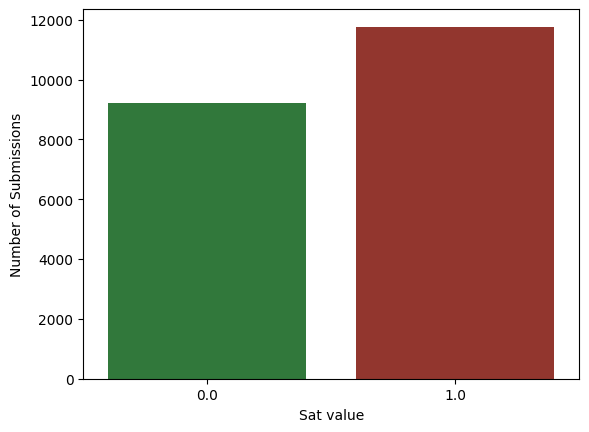

In [41]:
df = analyzePreparedData(trainDfs)

## Analyze test data

Total number of submissions: 1323
Total number of correct submissions: 0
Total number of incorrect submissions: 1323
Total number of unique ASTs: 1163


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect,NumUniqueASTs
44,YH3ANm7Y5Qe5dSYem,inv14,91,0,91,66
56,zoEADeCW2b2suJB2k,inv4,80,0,80,66
66,zRAn69AocpkmxXZnW,inv15,77,0,77,68
28,PQAJE67kz8w5NWJuM,inv7,57,0,57,49
11,gAeD3MTGCCv8YNTaK,undirected,53,0,53,46
16,JC8Tij8o8GZb99gEJ,Inv4,53,0,53,46
45,YH3ANm7Y5Qe5dSYem,inv15,51,0,51,49
12,gAeD3MTGCCv8YNTaK,weaklyConnected,48,0,48,44
41,YH3ANm7Y5Qe5dSYem,inv11,47,0,47,33
27,PQAJE67kz8w5NWJuM,inv6,45,0,45,39


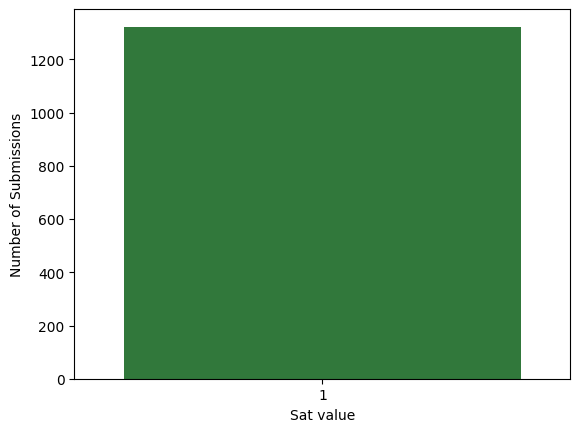

In [42]:
analyzePreparedData(testDfs)

# Graph Analysis

In [43]:
def importGraphAnalytics(path):
    return pd.read_csv(path)

def analyzeGraphAnalytics(df):
    total_submissions = 0
    total_correct = 0
    total_incorrect = 0
    total_edges = 0

    for index, row in df.iterrows():
        total_submissions += row["NumSubmissions"]
        total_correct += row["NumCorrect"]
        total_incorrect += row["NumIncorrect"]
        total_edges += row["NumEdges"]

    print("Total number of submissions: " + str(total_submissions))
    print("Total number of correct submissions: " + str(total_correct))
    print("Total number of incorrect submissions: " + str(total_incorrect))
    print("Total number of edges: " + str(total_edges))

PATH = "./evaluation/"

In [44]:
df = importGraphAnalytics(PATH + "graph_statistics.csv")
analyzeGraphAnalytics(df)

Total number of submissions: 7690
Total number of correct submissions: 985
Total number of incorrect submissions: 6705
Total number of edges: 11709


In [45]:
df

,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect,NumEdges
0,jyS8Bmceejj9pLbTW,Inv1,30,7,23,48
1,jyS8Bmceejj9pLbTW,Inv2,55,7,48,75
2,jyS8Bmceejj9pLbTW,Inv3,41,17,24,50
3,jyS8Bmceejj9pLbTW,Inv4,91,16,75,112
4,PQAJE67kz8w5NWJuM,inv1,24,14,10,43
5,PQAJE67kz8w5NWJuM,inv2,20,5,15,38
6,PQAJE67kz8w5NWJuM,inv3,27,6,21,42
7,PQAJE67kz8w5NWJuM,inv4,39,13,26,68
8,PQAJE67kz8w5NWJuM,inv5,75,9,66,143
9,PQAJE67kz8w5NWJuM,inv6,60,12,48,113


# Hint Analysis

## APTED Mapping
- Creates new paths when TED too long;
- Uses APTED;
- Uses TED for the cost function;

Import data.

In [46]:
apted_df = pd.read_json(PATH + "apted_hint_stats.json", lines=True)
total_hints = len(apted_df)

Analyze shorter paths.

In [47]:
count = apted_df["createdShorterPath"].value_counts()
print("Total number of hints: " + str(total_hints))
print("Number of hints when shorter path was created: " + str(count[1]) + " (" + str(round(count[1] / total_hints * 100, 2)) + "%)")
print("Number of hints when no path was created: " + str(count[0]) + " (" + str(round(count[0] / total_hints * 100, 2)) + "%)")

Total number of hints: 1323
Number of hints when shorter path was created: 88 (6.65%)
Number of hints when no path was created: 1235 (93.35%)


Analyze number of new nodes in the graph.

In [48]:
count = apted_df["isNewNode"].value_counts()
print("Total number of hints: " + str(total_hints))
print("Number of old submissions: " + str(count[1]) + " (" + str(round(count[1] / total_hints * 100, 2)) + "%)")
print("Number of new submissions: " + str(count[0]) + " (" + str(round(count[0] / total_hints * 100, 2)) + "%)")

Total number of hints: 1323
Number of old submissions: 319 (24.11%)
Number of new submissions: 1004 (75.89%)


## GumTree Mapping
- Creates new paths when TED too long;
- Uses GumTree;
- Uses TED for the cost function;

Import data.

In [49]:
gumtree_df = pd.read_json(PATH + "gumtree_hint_stats.json", lines=True)

Compare number of operations generated.

In [50]:
# Merge the two dataframes
merge_df = pd.merge(apted_df, gumtree_df, on=["challenge", "predicate", "expression", "code"], suffixes=("_a", "_g"))
merge_df.drop(["challenge", "predicate", "code", "type_a", "type_g"], inplace=True, axis=1)
total_hints = len(merge_df)

# Add columns counting number of operations
merge_df["nOps_a"] = merge_df["operations_a"].apply(lambda x: len(x[1:-1].split(")\", \"")))
merge_df["nOps_g"] = merge_df["operations_g"].apply(lambda x: len(x[1:-1].split(")\", \"")))

# Count number of hints with lower, higher and equal number of operations
lower = merge_df[merge_df["nOps_a"] < merge_df["nOps_g"]]
num_lower = len(lower)
higher = merge_df[merge_df["nOps_a"] > merge_df["nOps_g"]]
num_higher = len(higher)
equal = merge_df[merge_df["nOps_a"] == merge_df["nOps_g"]]
num_equal = len(equal)

print("Total number of hints: " + str(total_hints))
print("APTED lower number of operations: " + str(num_lower) + " (" + str(round(num_lower / total_hints * 100, 2)) + "%)")
print("GumTree lower number of operations: " + str(num_higher) + " (" + str(round(num_higher / total_hints * 100, 2)) + "%)")
print("Equal number of operations: " + str(num_equal) + " (" + str(round(num_equal / total_hints * 100, 2)) + "%)")

Total number of hints: 1323
APTED lower number of operations: 390 (29.48%)
GumTree lower number of operations: 267 (20.18%)
Equal number of operations: 666 (50.34%)


Compare time it takes.

In [51]:
# count number of hints with lower, higher and equal time
lower = merge_df[merge_df["time_a"] < merge_df["time_g"]]
num_lower = len(lower)
higher = merge_df[merge_df["time_a"] > merge_df["time_g"]]
num_higher = len(higher)
equal = merge_df[merge_df["time_a"] == merge_df["time_g"]]
num_equal = len(equal)

print("Total number of hints: " + str(total_hints))
print("APTED lower time: " + str(num_lower) + " (" + str(round(num_lower / total_hints * 100, 2)) + "%)")
print("GumTree lower time: " + str(num_higher) + " (" + str(round(num_higher / total_hints * 100, 2)) + "%)")
print("Equal time: " + str(num_equal) + " (" + str(round(num_equal / total_hints * 100, 2)) + "%)")


Total number of hints: 1323
APTED lower time: 467 (35.3%)
GumTree lower time: 616 (46.56%)
Equal time: 240 (18.14%)


# Teacher study

Get top 10 most popular incorrect submissions.

In [53]:
df = pd.read_csv("./evaluation/popularity_stats.csv", delimiter=";").sort_values("Popularity", ascending=False)
df = df[(df["Challenge"] == "gAeD3MTGCCv8YNTaK") | (df["Challenge"] == "zoEADeCW2b2suJB2k")]
df = df.head(20).sort_values(["Challenge", "Predicate"])
df = df[["Challenge", "Predicate", "Expr"]]


Get generated hints 

Export.

In [54]:
df.to_csv("./evaluation/most_popular.csv", sep=";", index=False)

Import with hints.

In [55]:
df = pd.read_csv("./evaluation/teacher_study.csv", delimiter=";")
df.drop_duplicates(subset=["Hint"], inplace=True)
df.sort_values(["Challenge", "Predicate"], inplace=True)
df

,Challenge,Predicate,Expression,Solution,Hint
0,gAeD3MTGCCv8YNTaK,complete,all n : Node | Node in n.^adj,all n:Node |Node in n.adj,"One step away from the solution! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the transitive closure operator ('^'). If you want to keep it, try to fix your expression another way and reach a different solution!"
2,gAeD3MTGCCv8YNTaK,noLoops,all n : Node | n != n.adj,all n:Node | n not in n.adj,Near a solution! Consider adding a variable of type Node to help satisfy the required property. Think about how you can incorporate this within the not equal operator ('!=') expression.
3,gAeD3MTGCCv8YNTaK,stonglyConnected,all n : Node | Node in n.^adj,all n:Node | Node in n.*adj,"One step away from the solution! Instead of using transitive closure operator ('^') to get the transitive closure of a relation, try using reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation."
4,gAeD3MTGCCv8YNTaK,stonglyConnected,Node in Node.^adj,all n:Node | Node in n.*adj,"Keep going! Instead of using transitive closure operator ('^') to get the transitive closure of a relation, try using reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation."
6,gAeD3MTGCCv8YNTaK,undirected,all n : Node | n in n.adj.~adj,adj = ~adj,"Keep going! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the variable of type Node. If you want to keep it, try to fix your expression another way and reach a different solution!"
7,gAeD3MTGCCv8YNTaK,undirected,adj.~adj in iden,adj = ~adj,"Near a solution! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the identity relation constructor ('iden'). If you want to keep it, try to fix your expression another way and reach a different solution!"
8,gAeD3MTGCCv8YNTaK,weaklyConnected,all n: Node | Node in n.^adj,all v : Node | Node in v.*(adj + ~adj),Keep going! Consider adding a reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation. Think about how you can incorporate this within the dot join operator ('.') expression.
10,gAeD3MTGCCv8YNTaK,weaklyConnected,all e1 : Node | Node in (e1.*adj + *adj.e1),all n:Node | Node in (n.^(adj + ~adj) +n),Keep going! Consider adding a dot join operator ('.') to perform a relational join between sets or relations. Think about how you can incorporate this within the union operator ('+') expression.
11,gAeD3MTGCCv8YNTaK,weaklyConnected,all n: Node | Node in (n.^adj + n.^~adj),all v : Node | Node in v.*(adj + ~adj),Keep going! Consider adding a reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation. Think about how you can incorporate this within the union operator ('+') expression.
13,zoEADeCW2b2suJB2k,inv1,some State.trans,all s : State | some s.trans,"Keep going! You can use variables to help specify the condition. Consider introducing a new variable ""State"" to your expression using the universal quantifier ('all')."


In [56]:
# Remove repeated operations
df.drop([2,4,6,14], inplace=True)
df

,Challenge,Predicate,Expression,Solution,Hint
0,gAeD3MTGCCv8YNTaK,complete,all n : Node | Node in n.^adj,all n:Node |Node in n.adj,"One step away from the solution! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the transitive closure operator ('^'). If you want to keep it, try to fix your expression another way and reach a different solution!"
3,gAeD3MTGCCv8YNTaK,stonglyConnected,all n : Node | Node in n.^adj,all n:Node | Node in n.*adj,"One step away from the solution! Instead of using transitive closure operator ('^') to get the transitive closure of a relation, try using reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation."
7,gAeD3MTGCCv8YNTaK,undirected,adj.~adj in iden,adj = ~adj,"Near a solution! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the identity relation constructor ('iden'). If you want to keep it, try to fix your expression another way and reach a different solution!"
8,gAeD3MTGCCv8YNTaK,weaklyConnected,all n: Node | Node in n.^adj,all v : Node | Node in v.*(adj + ~adj),Keep going! Consider adding a reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation. Think about how you can incorporate this within the dot join operator ('.') expression.
10,gAeD3MTGCCv8YNTaK,weaklyConnected,all e1 : Node | Node in (e1.*adj + *adj.e1),all n:Node | Node in (n.^(adj + ~adj) +n),Keep going! Consider adding a dot join operator ('.') to perform a relational join between sets or relations. Think about how you can incorporate this within the union operator ('+') expression.
11,gAeD3MTGCCv8YNTaK,weaklyConnected,all n: Node | Node in (n.^adj + n.^~adj),all v : Node | Node in v.*(adj + ~adj),Keep going! Consider adding a reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation. Think about how you can incorporate this within the union operator ('+') expression.
13,zoEADeCW2b2suJB2k,inv1,some State.trans,all s : State | some s.trans,"Keep going! You can use variables to help specify the condition. Consider introducing a new variable ""State"" to your expression using the universal quantifier ('all')."
15,zoEADeCW2b2suJB2k,inv3,"all x : State, y : Event | lone x.trans.y","all s: State, e: Event | lone ~(s.trans).e",One step away from the solution! Consider adding a transpose operator ('~') to transpose a relation. Think about how you can incorporate this within the dot join operator ('.') expression.
17,zoEADeCW2b2suJB2k,inv4,all s : State | s in Event.(Init.trans),"let t = { x : State, y : State | some e : Event | x->e->y in trans} | all s:State | s in Init.(^t)",Keep going! Consider adding a let expression ('let var = expression1 | expression2') to introduce a new variable. Think about how you can incorporate this within your expression to ensure the required property.
18,zoEADeCW2b2suJB2k,inv5,all s:State | Event in State.~(s.trans),all s : State | (State.trans).State = (s.trans).State,Keep going! Consider adding a dot join operator ('.') to perform a relational join between sets or relations. Think about how you can incorporate this within the inclusion operator ('in') expression.


Export.

In [57]:
df.to_csv("./evaluation/hint_examples.csv", sep=";", index=False)

# Study Analysis

## Chalch

Import data.

In [74]:
df = pd.read_json("./evaluation/Study/first_chalch/HigenaHint.json")
df[["expression", "sourceExpr","hint"]]

,expression,sourceExpr,hint
0,undirected,all n : Node | n in n.adj.adj,"Keep going! You can use variables to help specify the condition. Consider introducing a new variable ""disj"" to your expression using the universal quantifier ('all')."
1,noLoops,"all x, y: Node | x in y.(^adj)","Keep going! You can use variables to help specify the condition. Consider introducing a new variable ""=>"" to your expression using the universal quantifier ('all')."
2,noLoops,"all x, y: Node | x not in y.(^adj)","Keep going! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the transitive closure operator ('^'). If you want to keep it, try to fix your expression another way and reach a different solution!"
3,noLoops,"all x, y: Node | x not in y.(adj)","Keep going! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the one of. If you want to keep it, try to fix your expression another way and reach a different solution!"
4,noLoops,all n:Node | n not in n.^adj,"One step away from the solution! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the transitive closure operator ('^'). If you want to keep it, try to fix your expression another way and reach a different solution!"
5,weaklyConnected,all n:Node | n in n.^adj,Keep going! Consider adding a reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation. Think about how you can incorporate this within the dot join operator ('.') expression.
6,weaklyConnected,all n : Node | n in n.*adj,Keep going! Consider adding a union operator ('+') to combine two sets. Think about how you can incorporate this within the reflexive-transitive closure operator ('*') expression.
7,weaklyConnected,all n:Node | n in n.^adj,Keep going! Consider adding a reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation. Think about how you can incorporate this within the dot join operator ('.') expression.
8,weaklyConnected,all x: Node | x in x.(^adj) || (no x.adj),Keep going! Consider adding a dot join operator ('.') to perform a relational join between sets or relations. Think about how you can incorporate this within the disjunction operator ('or') expression.
9,weaklyConnected,"all a,b:Node | b in a.^adj",Keep going! Consider adding a reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation. Think about how you can incorporate this within the dot join operator ('.') expression.
